In [21]:
import tuxml
import pandas as pd

In [23]:
df = tuxml.load_dataset()
df[:10]
df.shape

(92471, 9259)

In [3]:
df.sort_values("vmlinux")[:10]

,OPENVSWITCH,TEXTSEARCH_FSM,NETFILTER_XT_MATCH_TCPMSS,MPLS,NFC_HCI,NETFILTER_XT_MATCH_TIME,NET_MPLS_GSO,NFC_SHDLC,NETFILTER_XT_MATCH_U32,OPENVSWITCH_GRE,...,LZO-vmlinux,LZO,LZ4-bzImage,LZ4-vmlinux,LZ4,cid,nbyes,nbno,nbmodule,nbyesmodule
109097,0,0,0,0,0,0,0,0,0,0,...,2863640,644621,814544.0,2900824,669288,124978,25,9210,0,25
58621,0,0,0,0,0,0,0,0,0,0,...,2777624,558712,724432.0,2810712,578375,74458,24,9211,0,24
107213,0,0,0,0,0,0,0,0,0,0,...,3953176,1734208,1986512.0,4072280,1841339,123091,525,8041,669,1194
99232,0,0,0,0,0,0,0,0,0,0,...,4248440,2027905,2290640.0,4375728,2144007,115110,420,8104,711,1131
99777,0,0,0,0,0,0,0,0,0,0,...,4096536,1877790,2139088.0,4223832,1994471,115655,505,8324,406,911
91160,0,0,0,0,0,0,0,0,0,0,...,4297240,2077003,2347472.0,4432728,2203924,107038,631,7804,800,1431
109537,0,0,0,0,0,0,0,0,0,0,...,4232056,2011955,2282448.0,4367536,2133755,125418,508,8199,528,1036
80771,0,0,0,0,0,0,0,0,0,0,...,4338200,2120182,2397136.0,4481880,2251054,96648,641,8136,458,1099
66399,0,0,0,0,0,0,0,0,0,0,...,4621176,2401304,2691024.0,4777136,2542313,82269,600,7704,931,1531
96643,0,0,0,0,0,0,0,0,0,0,...,4928376,2707431,3019728.0,5104816,2870154,112521,619,7899,717,1336


In [4]:
size_methods = ["vmlinux", "GZIP-bzImage", "GZIP-vmlinux", "GZIP", "BZIP2-bzImage", 
              "BZIP2-vmlinux", "BZIP2", "LZMA-bzImage", "LZMA-vmlinux", "LZMA", "XZ-bzImage", "XZ-vmlinux", "XZ", 
              "LZO-bzImage", "LZO-vmlinux", "LZO", "LZ4-bzImage", "LZ4-vmlinux", "LZ4"]

In [5]:
import matplotlib.pyplot as plt
plt.figure()
pd.DataFrame(df['vmlinux']).plot.box()
plt.show(block=False)


plt.figure()
pd.DataFrame(df['vmlinux'] / 1048576).plot.box()
plt.show(block=False)

plt.figure()
pd.DataFrame(df['LZO']).plot.box()
plt.show(block=False)

plt.figure()
pd.DataFrame(df['BZIP2']).plot.box()
plt.show(block=False)


print((df['GZIP-vmlinux'] / 1048576).describe())
print((df['vmlinux'] / 1048576).describe())

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 1 Axes>

count    92471.000000
mean        10.598258
std          5.067311
min          2.606560
25%          7.241585
50%          9.325638
75%         12.500435
max        105.566864
Name: GZIP-vmlinux, dtype: float64
count    92471.000000
mean        47.351335
std         67.485701
min          6.966263
25%         21.575394
50%         29.995773
75%         45.562561
max       1698.141251
Name: vmlinux, dtype: float64


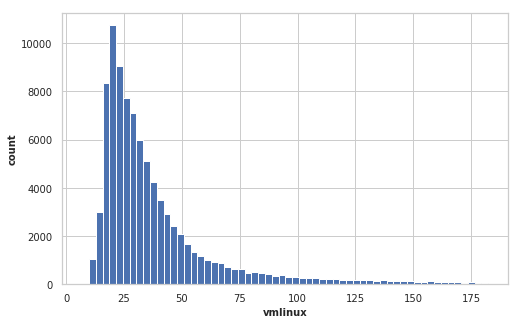

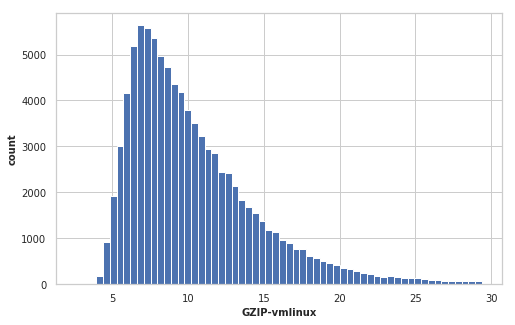

In [20]:
#print(408678 / 1048576)
#print(408678 / 1000000)

import seaborn as sns

sns.set(style='whitegrid', palette="deep", font_scale=1.1, rc={"figure.figsize": [8, 5]})

# plt.style.use('ggplot')

plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = 'Ubuntu'
plt.rcParams['font.monospace'] = 'Ubuntu Mono'
plt.rcParams['font.size'] = 10
plt.rcParams['axes.labelsize'] = 10
plt.rcParams['axes.labelweight'] = 'bold'
plt.rcParams['xtick.labelsize'] = 10
plt.rcParams['ytick.labelsize'] = 10
plt.rcParams['legend.fontsize'] = 10
plt.rcParams['figure.titlesize'] = 12

plt.figure()
(df['vmlinux'][df['vmlinux'] < df['vmlinux'].quantile(0.97)] / 1048576).hist(bins=60)
# plt.title("Distribution of vmlinux size (in Mb, quantile=0.95)")
plt.xlabel('vmlinux')
plt.ylabel('count')
plt.savefig("output-figs/vmlinux-hist.pdf", bbox_inches = 'tight', pad_inches = 0)
plt.show()

plt.figure()
(df['GZIP-vmlinux'][df['GZIP-vmlinux'] < df['GZIP-vmlinux'].quantile(0.99)] / 1048576).hist(bins=60)
# plt.title("Distribution of GZIP-vmlinux size (in Mb, quantile=0.95)")
plt.xlabel('GZIP-vmlinux')
plt.ylabel('count')
plt.savefig("output-figs/gzip-vmlinux-hist.pdf", bbox_inches = 'tight', pad_inches = 0)
plt.show()

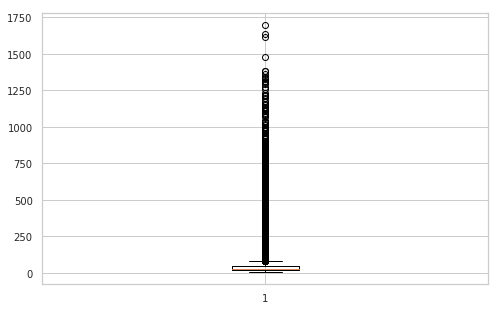

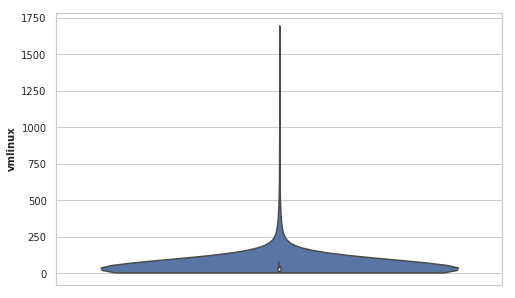

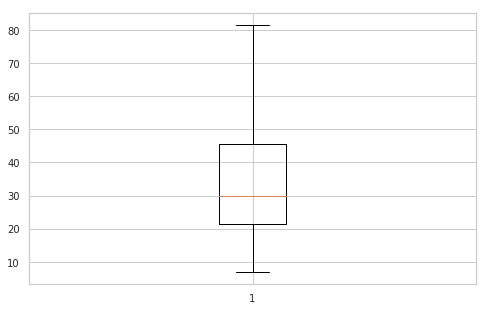

In [7]:
import seaborn as sns

# Make boxplot for one group only
# sns.violinplot( x=(df["vmlinux"] / 1048576), showfliers=False, bw= 1.0, cut = 0)

plt.figure()
plt.boxplot(df['vmlinux'] / 1048576, showfliers=True)
plt.show()

plt.figure()
sns.violinplot( y=(df["vmlinux"] / 1048576), cut=0, bw=.9, scale="width")
plt.show()

plt.figure()
plt.boxplot(df['vmlinux'] / 1048576, showfliers=False)
plt.show()

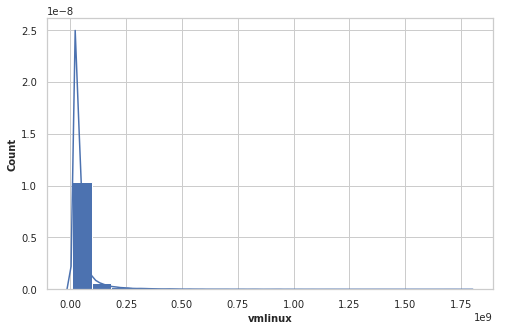

In [8]:
import seaborn as sns

# sns.set(style='whitegrid', palette="deep", font_scale=1.1, rc={"figure.figsize": [8, 5]})
sns.distplot(
    df["vmlinux"], norm_hist=False, kde=True, bins=20, hist_kws={"alpha": 1}
).set(xlabel='vmlinux', ylabel='Count');

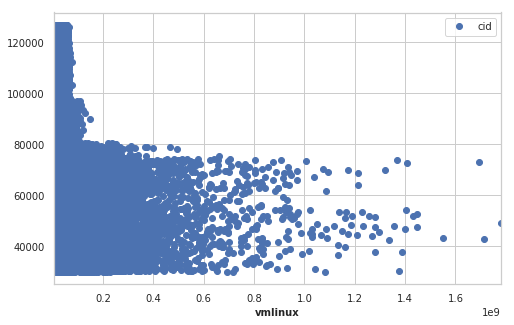

In [9]:
df.plot(x="vmlinux", y="cid", style="o")

In [10]:
import scipy.stats
import seaborn as sns
import numpy as np



def color_negative_positive(val, pcolor="green", ncolor="red"):
    """
    Takes a scalar and returns a string with
    the css property `'color: red'` for negative
    strings, black otherwise.
    """
    color = pcolor if val > 0 else ncolor 
    if val == 0:
        color = 'black' 
    return 'color: %s' % color

compress_methods = ["GZIP", "BZIP2", "LZMA", "XZ", "LZO", "LZ4"]
def compareCompress(size_measure_of_interest): #"" # "-vmlinux" #"-bzImage" # prefix
    rCompressDiff = pd.DataFrame(index=list(map(lambda c: c + "o", compress_methods)) , columns=compress_methods) 
    for compress_method in compress_methods:
        for compress_method2 in compress_methods:
            rCompressDiff.loc[compress_method + "o"][compress_method2] = (np.mean(df[compress_method + size_measure_of_interest] / df[compress_method2 + size_measure_of_interest]) * 100) - 100
    return rCompressDiff

#cmy = sns.light_palette("red", as_cmap=True)
compareCompress("").style.set_caption('Difference (average in percentage) per compression methods').applymap(color_negative_positive)

,GZIP,BZIP2,LZMA,XZ,LZO,LZ4
GZIPo,0,3.00927,23.8295,35.775,-9.70977,-11896.2
BZIP2o,-2.87205,0,20.276,31.8624,-12.3289,-11441.1
LZMAo,-19.1917,-16.7598,0,9.63275,-27.0131,-9365.11
XZo,-9079.37,-9077.15,-9061.82,0,-33.2221,-8685.34
LZOo,-17283,-17279.7,-17256.6,50.5076,0,-13211.9
LZ4o,-18866,-18862.5,-18837.6,61.0352,6.93776,0


In [11]:
compareCompress("-vmlinux").style.set_caption('Difference (average in percentage) per compression methods, vmlinux').applymap(color_negative_positive)


,GZIP,BZIP2,LZMA,XZ,LZO,LZ4
GZIPo,0,-28.1465,17.6087,25.5951,-7.48979,-12.3437
BZIP2o,41.0556,0,65.3317,76.2405,30.6506,23.8874
LZMAo,-14.8725,-39.0396,0,6.74528,-21.2054,-25.3171
XZo,-20.0819,-42.8681,-6.15874,0,-26.0152,-29.8666
LZOo,8.14584,-22.1959,27.2664,35.9318,0,-5.26847
LZ4o,14.2047,-17.7728,34.4445,43.6185,5.57607,0


In [12]:
print(compareCompress("-vmlinux").to_latex())

\begin{tabular}{lllllll}
\toprule
{} &     GZIP &    BZIP2 &     LZMA &       XZ &      LZO &      LZ4 \\
\midrule
GZIPo  &        0 & -28.1465 &  17.6087 &  25.5951 & -7.48979 & -12.3437 \\
BZIP2o &  41.0556 &        0 &  65.3317 &  76.2405 &  30.6506 &  23.8874 \\
LZMAo  & -14.8725 & -39.0396 &        0 &  6.74528 & -21.2054 & -25.3171 \\
XZo    & -20.0819 & -42.8681 & -6.15874 &        0 & -26.0152 & -29.8666 \\
LZOo   &  8.14584 & -22.1959 &  27.2664 &  35.9318 &        0 & -5.26847 \\
LZ4o   &  14.2047 & -17.7728 &  34.4445 &  43.6185 &  5.57607 &        0 \\
\bottomrule
\end{tabular}



In [13]:
cm = sns.light_palette("green", as_cmap=True)
pd.DataFrame.corr(df[size_methods]).style.set_caption('Correlations between size measures').background_gradient(cmap=cm)

,vmlinux,GZIP-bzImage,GZIP-vmlinux,GZIP,BZIP2-bzImage,BZIP2-vmlinux,BZIP2,LZMA-bzImage,LZMA-vmlinux,LZMA,XZ-bzImage,XZ-vmlinux,XZ,LZO-bzImage,LZO-vmlinux,LZO,LZ4-bzImage,LZ4-vmlinux,LZ4
vmlinux,1,0.516397,0.516424,0.515071,0.529437,0.529293,0.528244,0.500999,0.501036,0.499203,0.500264,0.500304,0.498854,0.533398,0.533565,0.532801,0.540692,0.540869,0.540197
GZIP-bzImage,0.516397,1,1,0.999932,0.997733,0.997131,0.997819,0.997759,0.99776,0.997626,0.99354,0.993543,0.993413,0.997473,0.997486,0.9976,0.994642,0.994656,0.994786
GZIP-vmlinux,0.516424,1,1,0.999931,0.997737,0.997135,0.997823,0.997757,0.997759,0.997624,0.993538,0.993541,0.993411,0.997477,0.997491,0.997603,0.994648,0.994662,0.994792
GZIP,0.515071,0.999932,0.999931,1,0.99754,0.996936,0.997737,0.997697,0.997698,0.997745,0.993578,0.993579,0.993478,0.997334,0.997302,0.997432,0.994445,0.99441,0.994555
BZIP2-bzImage,0.529437,0.997733,0.997737,0.99754,1,0.999404,0.999953,0.994638,0.994645,0.994338,0.991162,0.991171,0.99082,0.998566,0.998574,0.998554,0.997401,0.997408,0.997418
BZIP2-vmlinux,0.529293,0.997131,0.997135,0.996936,0.999404,1,0.999356,0.99403,0.994038,0.993728,0.990537,0.990546,0.990193,0.997976,0.997984,0.997964,0.996818,0.996825,0.996834
BZIP2,0.528244,0.997819,0.997823,0.997737,0.999953,0.999356,1,0.994737,0.994744,0.994586,0.991346,0.991354,0.991032,0.998564,0.998536,0.998534,0.997339,0.997307,0.997333
LZMA-bzImage,0.500999,0.997759,0.997757,0.997697,0.994638,0.99403,0.994737,1,1,0.99988,0.994359,0.99436,0.994294,0.991706,0.991731,0.991878,0.987196,0.987223,0.987383
LZMA-vmlinux,0.501036,0.99776,0.997759,0.997698,0.994645,0.994038,0.994744,1,1,0.999879,0.994359,0.994359,0.994292,0.991713,0.991738,0.991885,0.987205,0.987233,0.987392
LZMA,0.499203,0.997626,0.997624,0.997745,0.994338,0.993728,0.994586,0.99988,0.999879,1,0.99437,0.99437,0.994341,0.991475,0.99144,0.99161,0.986886,0.986848,0.987028
